# Gradient Descent Class
`For now we are assuming we have m or b any one of them`

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_regression

In [36]:
x, y = make_regression(n_features=1, n_samples=100, n_informative=1, n_targets=1, noise=15)

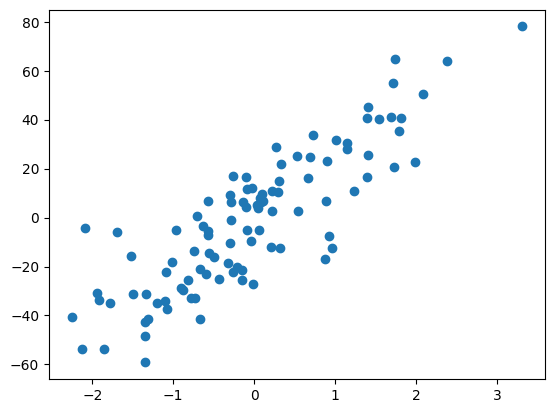

In [37]:
plt.scatter(x, y)

In [38]:
from sklearn.linear_model import LinearRegression

In [40]:
lr = LinearRegression()
lr.fit(x, y)
print('lr.coef_(m): ',lr.coef_)
print('lr.intercept_(b): ',lr.intercept_)

lr.coef_(m):  [21.74271409]
lr.intercept_(b):  -0.4705427612521583


In [ ]:
m = 21.74

In [44]:
class MyGDRegressor:
    def __init__(self, m, b, l_rate, epochs):
        self.intercept_ = b
        self.coeff_ = m
        self.learning_rate = l_rate
        self.epochs = epochs
        
    def fit(self, x_train, y_train):
        for i in range(self.epochs):
            loss_slope = -2*np.sum(y_train-self.coeff_*x_train.ravel()-self.intercept_)
            step_size = loss_slope*self.learning_rate
            self.intercept_ = self.intercept_ - step_size
        print(self.intercept_)
        pass
    
    
    def predict(self, x_test):
        return self.coeff_*x_test + self.intercept_
    
    def visualize_gd_graph(self):
        pass

In [ ]:
# gd = MyGDRegressor(m, 100, l_rate=0.1, epochs=100)
# in the above object learning rate is too high
# due to which our intercept value behave differently


# So always, alert for learning rate
gd = MyGDRegressor(m, 100, l_rate=0.001, epochs=100)

In [48]:
gd.fit(x,y)

-0.47065022607270107


In [99]:
from sklearn.metrics import mean_squared_error

class GDRegressorWithGraph:
    def __init__(self, m, b, l_rate, epochs):
        self.intercept_ = b
        self.coeff_ = m
        self.learning_rate = l_rate
        self.epochs = epochs
        self.history_b = []  # Track b for visualization
        self.history_loss = []  # Track loss for visualization

    def fit(self, x_train, y_train):
        x_train = x_train.ravel()
        y_train = y_train.ravel()
        
        for i in range(self.epochs):
            y_pred = self.coeff_ * x_train + self.intercept_
            loss = mean_squared_error(y_train, y_pred)
            self.history_b.append(self.intercept_)
            self.history_loss.append(loss)
            
            # Compute gradient and update b
            loss_slope = -2 * np.sum(y_train - y_pred)
            step_size = self.learning_rate * loss_slope
            self.intercept_ -= step_size
        
        print(f"Final b after {self.epochs} epochs: {self.intercept_:.4f}")

    def predict(self, x_test):
        return self.coeff_ * x_test + self.intercept_

    def visualize_gd_graph(self):
        """
        Plot Loss vs Bias (b) using the recorded gradient descent steps.
        """
        if not self.history_b or not self.history_loss:
            print("Model must be fitted first using .fit()")
            return

        plt.figure(figsize=(10, 6))
        plt.plot(self.history_b, self.history_loss, marker='o', color='blue', label='Gradient Descent Path')
        plt.xlabel('Bias (b)')
        plt.ylabel('Loss (MSE)')
        plt.title('Loss vs Bias (b) during Gradient Descent')
        plt.grid(True)
        plt.legend()
        plt.show()
    
    def visualize_loss_vs_epochs(self):
        """
        Plot Loss vs Epochs to visualize convergence of Gradient Descent.
        """
        if not self.history_loss:
            print("Model must be fitted first using .fit()")
            return

        plt.figure(figsize=(10, 6))
        plt.plot(range(1, len(self.history_loss) + 1), self.history_loss, marker='o', color='orange')
        plt.xlabel('Epoch')
        plt.ylabel('Loss (MSE)')
        plt.title('Loss vs Epochs during Gradient Descent')
        plt.xticks(np.arange(0, len(self.history_loss) + 1, 5))
        plt.grid(True)
        plt.show()



In [120]:
gd_with_graph = GDRegressorWithGraph(m, 1, l_rate=0.009, epochs=50)

In [121]:
gd_with_graph.fit(x, y)

Final b after 50 epochs: -0.4706


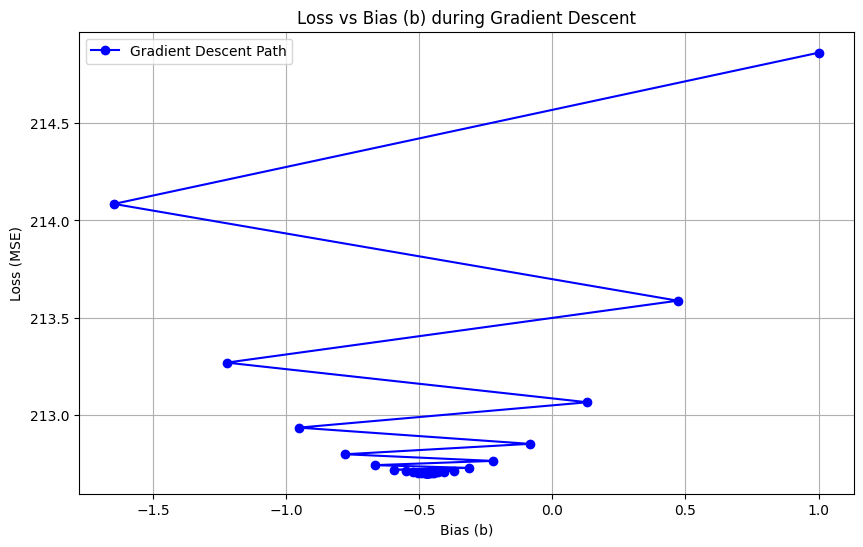

In [122]:
gd_with_graph.visualize_gd_graph()

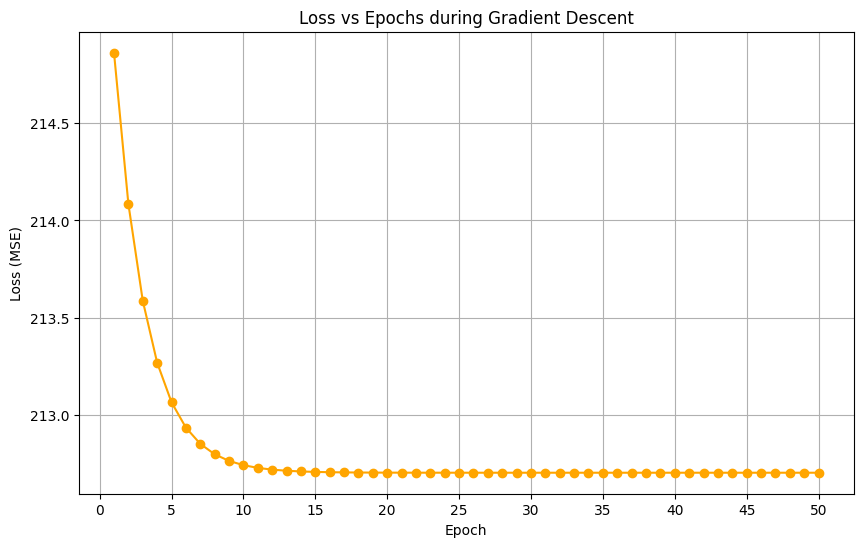

In [123]:
gd_with_graph.visualize_loss_vs_epochs()

### Cost Function

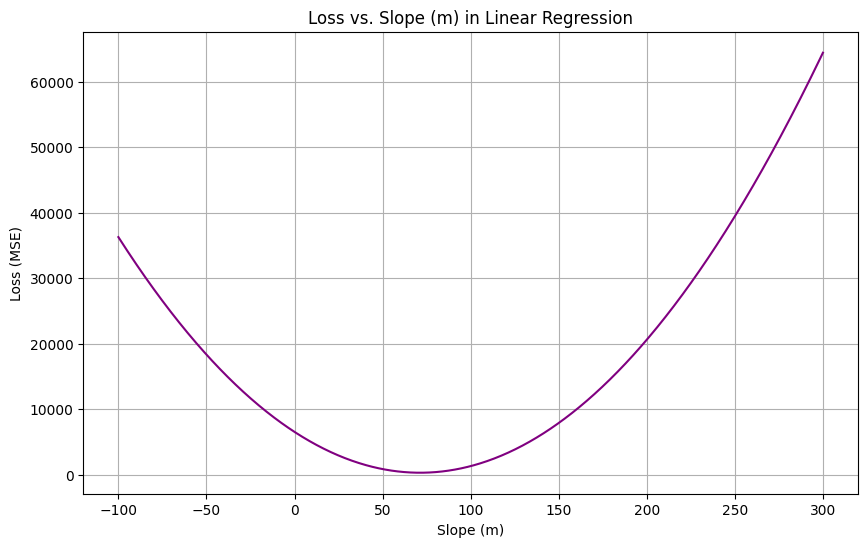

In [139]:
# Step 1: Generate data
x, y = make_regression(n_samples=20, n_features=1, noise=20, random_state=1)
x = x.ravel()
y = y.ravel()


m_values = np.linspace(-100, 300, 1000)
loss_values = []

# Fix bias
b = 0

# Step 3: Compute MSE for each m
for m in m_values:
    y_pred = m * x + b
    loss = mean_squared_error(y, y_pred)
    loss_values.append(loss)

# Step 4: Plot Loss vs m
plt.figure(figsize=(10, 6))
plt.plot(m_values, loss_values, color='purple')
plt.xlabel('Slope (m)')
plt.ylabel('Loss (MSE)')
plt.title('Loss vs. Slope (m) in Linear Regression')
plt.grid(True)
plt.show()

In [146]:
import plotly.graph_objects as go

# Step 1: Generate synthetic data
x, y = make_regression(n_samples=20, n_features=1, noise=20, random_state=1)
x = x.ravel()
y = y.ravel()

# Step 2: Create meshgrid of slope (m) and bias (b)
m_values = np.linspace(-100000, 100000, 100)
b_values = np.linspace(-100000, 100000, 100)
M, B = np.meshgrid(m_values, b_values)

# Step 3: Compute loss for each (m, b) pair
Loss = np.zeros_like(M)

for i in range(M.shape[0]):
    for j in range(M.shape[1]):
        y_pred = M[i, j] * x + B[i, j]
        Loss[i, j] = mean_squared_error(y, y_pred)

# Step 4: Plot with Plotly
fig = go.Figure(data=[go.Surface(z=Loss, x=M, y=B, colorscale='Viridis')])
fig.update_layout(
    title='3D Loss Surface of Linear Regression',
    scene=dict(
        xaxis_title='Slope (m)',
        yaxis_title='Intercept (b)',
        zaxis_title='Loss (MSE)'
    ),
    autosize=True,
    margin=dict(l=65, r=50, b=65, t=90)
)
fig.show()